# EDA Car Data Set

**We will explore the Car Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:**

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**
- **Normalization and Scaling(Numerical Variables)**
- **Encoding Categorical variables**
- **Univariate Analysis**
- **Bivariate Analysis**

**As a first step, we will import all the necessary libraries that we think we will requiring to perform the EDA.**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.3.2
1.19.5
3.4.2
0.11.2


# Loading the data set

**We will  be loading the EDA cars excel file using pandas. For this we will be using read_excel file.**

In [3]:
df=pd.read_excel('EDA Cars-1.xlsx')

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [4]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas


In [5]:
df.drop(labels = 'INDEX',inplace=True,axis=1)

In [6]:
df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas
1,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas
2,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas
3,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas
4,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas


**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [7]:
df.shape

(303, 11)

**Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 11 variables in the data set.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INCOME          260 non-null    float64
 1   MARITAL STATUS  275 non-null    object 
 2   SEX             297 non-null    object 
 3   EDUCATION       259 non-null    object 
 4   JOB             257 non-null    object 
 5   TRAVEL TIME     262 non-null    float64
 6   USE             250 non-null    object 
 7   MILES CLOCKED   278 non-null    float64
 8   CAR TYPE        293 non-null    object 
 9   CAR AGE         283 non-null    float64
 10  CITY            297 non-null    object 
dtypes: float64(4), object(7)
memory usage: 26.2+ KB


**info() is used to check the Information about the data and the datatypes of each respective attributes.**

In [9]:
df.describe()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
count,260.000000,262.000000,278.000000,283.000000
mean,50025.162170,34.282098,13591.978417,6.265018
std,41186.807914,14.910178,7167.328655,5.111218
min,0.000000,5.000000,1500.000000,1.000000
25%,20452.885022,24.449874,7900.000000,1.000000
50%,44571.590870,33.564757,12065.000000,6.000000
75%,66485.761387,43.907339,18240.000000,10.000000
max,204667.589700,83.617643,38000.000000,20.000000


**The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

# Check for Duplicate records

In [10]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 14


,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
69,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
70,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
71,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
72,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
73,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
74,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
75,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
76,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
77,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles
78,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles


**Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records.**

In [11]:
df.drop_duplicates(inplace=True) 

**Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.**

In [12]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY


**Now, we can  clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute as those 14 records should be removed from the original data. Initially it had 303 records now it should have 289**

In [13]:
df.shape

(289, 11)

# Outlier Treatment - What are outliers?

**To check for outliers/extreme values, we will be plotting the box plots.**

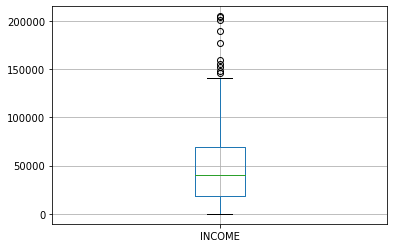

In [14]:
df.boxplot(column=['INCOME'])
plt.show()

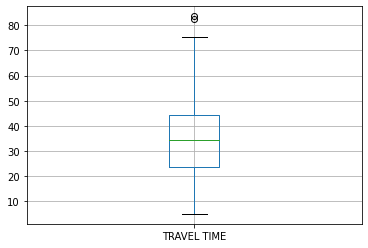

In [15]:
df.boxplot(column=['TRAVEL TIME'])
plt.show()

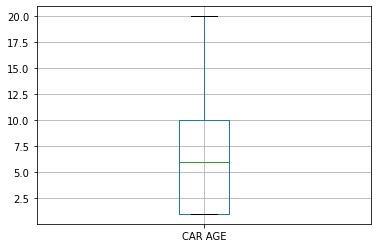

In [16]:
df.boxplot(column=['CAR AGE'])
plt.show()

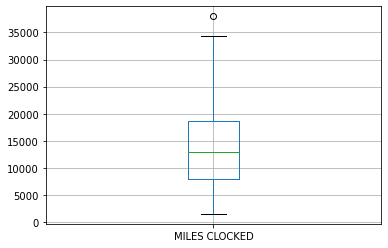

In [17]:
df.boxplot(column='MILES CLOCKED')
plt.show()

In [18]:
df.select_dtypes(exclude = 'object').columns

Index(['INCOME', 'TRAVEL TIME', 'MILES CLOCKED', 'CAR AGE'], dtype='object')

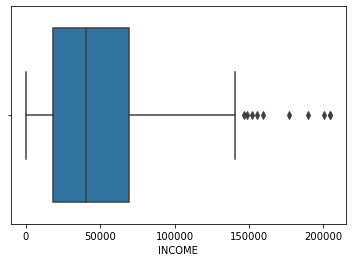

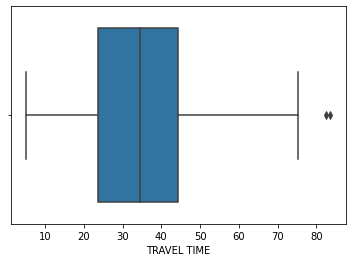

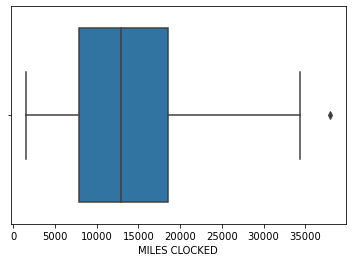

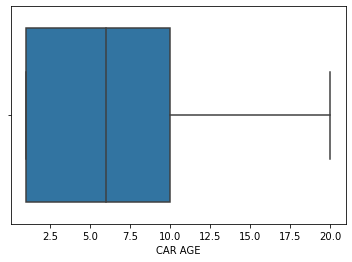

In [19]:
for i in df.select_dtypes(exclude = 'object').columns:
    sns.boxplot(x=i,data=df,whis=1.5)
    plt.show()

<AxesSubplot:>

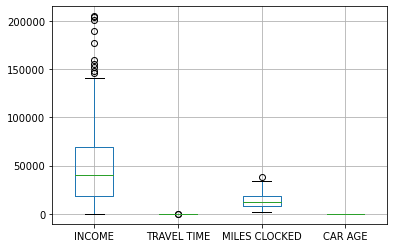

In [20]:
df.boxplot()

**Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [22]:
remove_outlier(df['INCOME'])

(-57894.09117250001, 145823.3667675)

In [23]:
lrincome,urincome=remove_outlier(df['INCOME'])
df['INCOME']=np.where(df['INCOME']>urincome,urincome,df['INCOME'])
df['INCOME']=np.where(df['INCOME']<lrincome,lrincome,df['INCOME'])


lrtravel,urtravel=remove_outlier(df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']>urtravel,urtravel,df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']<lrtravel,lrtravel,df['TRAVEL TIME'])

lrmiles,urmiles=remove_outlier(df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']>urmiles,urmiles,df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']<lrmiles,lrmiles,df['MILES CLOCKED'])

#df.shape

##  Make Boxplots after Outlier Treatment

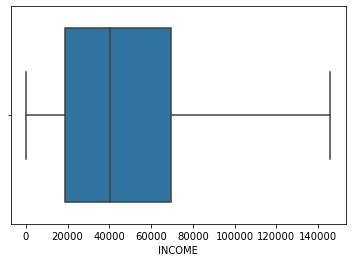

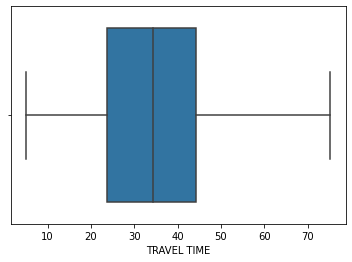

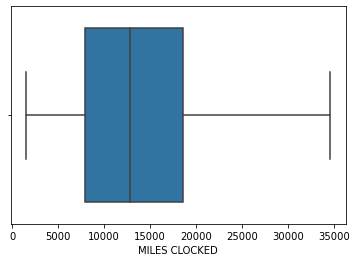

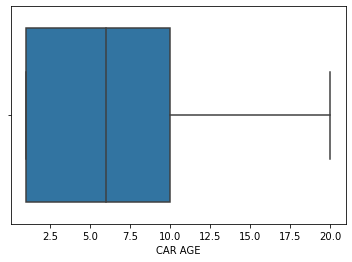

In [24]:
for i in df.select_dtypes(exclude = 'object').columns:
    sns.boxplot(x=i,data=df,whis=1.5)
    plt.show()

# Check for missing value

In [25]:
df.isnull().sum()

INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
dtype: int64

In [26]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
dtype: int64

## How to treat missing values?

In [27]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

INCOME            float64
MARITAL STATUS     object
SEX                object
EDUCATION          object
JOB                object
TRAVEL TIME       float64
USE                object
MILES CLOCKED     float64
CAR TYPE           object
CAR AGE           float64
CITY               object
dtype: object

**Replacing NULL values in Numerical Columns using Median**

In [28]:
median1=df["INCOME"].median()
median2=df["TRAVEL TIME"].median()
median3=df["MILES CLOCKED"].median()
median4=df["CAR AGE"].median()

df["INCOME"].replace(np.nan,median1,inplace=True)
df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
df["CAR AGE"].replace(np.nan,median4,inplace=True)


**Replacing NULL values in Categorical Columns using Mode**

In [29]:
mode1=df["SEX"].mode().values[0]
mode2=df["MARITAL STATUS"].mode().values[0]
mode3=df["EDUCATION"].mode().values[0]
mode4=df["JOB"].mode().values[0]
mode5=df["USE"].mode().values[0]
mode6=df['CITY'].mode().values[0]
mode7=df["CAR TYPE"].mode().values[0]



df["SEX"]=df["SEX"].replace(np.nan,mode1)
df["MARITAL STATUS"]= df["MARITAL STATUS"].replace(np.nan,mode2)
df["EDUCATION"]=df["EDUCATION"].replace(np.nan,mode3)
df["JOB"]=df["JOB"].replace(np.nan,mode4)
df["USE"]=df["USE"].replace(np.nan,mode5)
df["CAR TYPE"]=df["CAR TYPE"].replace(np.nan,mode7)
df['CITY']=df['CITY'].replace(np.nan,mode6)

In [30]:
# Check for missing value in any column
df.isnull().sum()

INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
dtype: int64

# Univariate Analysis - Graphics

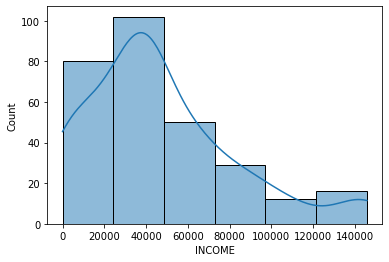

In [34]:
sns.histplot(df['INCOME'],bins=6,kde=True);

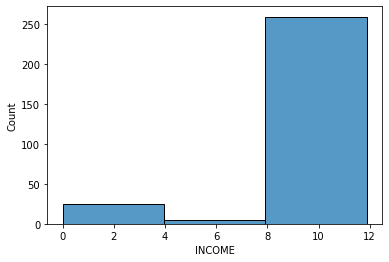

In [36]:
sns.histplot(np.log1p(df['INCOME']),bins=3);

# Bivariate Analysis

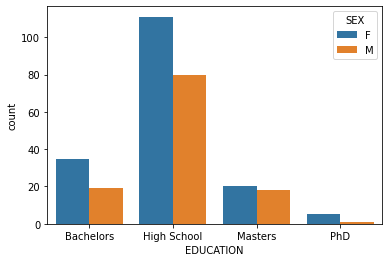

In [37]:
sns.countplot(x = "EDUCATION",hue="SEX",data=df) ;

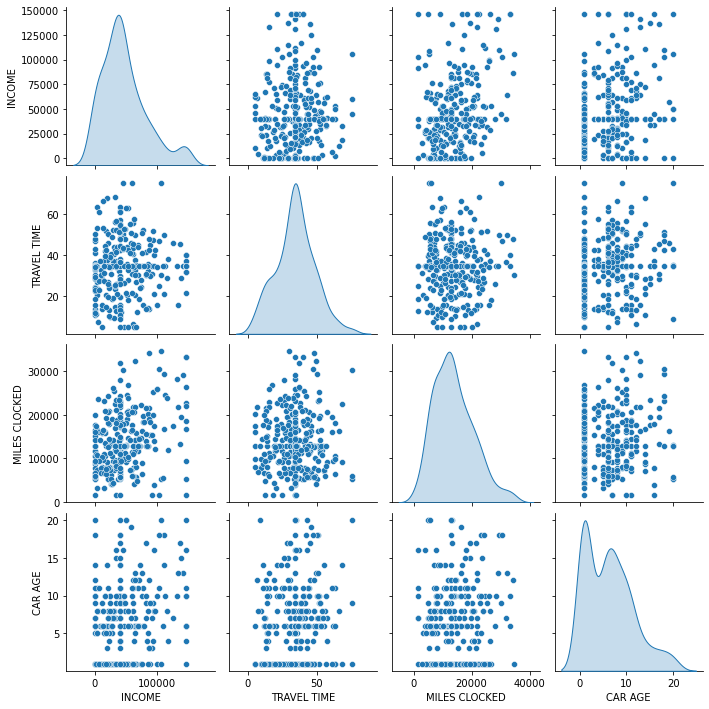

In [38]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [39]:
df.corr()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
INCOME,1.000000,0.059463,0.341234,0.264218
TRAVEL TIME,0.059463,1.000000,0.023640,0.145489
MILES CLOCKED,0.341234,0.023640,1.000000,0.129989
CAR AGE,0.264218,0.145489,0.129989,1.000000


**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

## Correlation Heatmap - What is correlation?

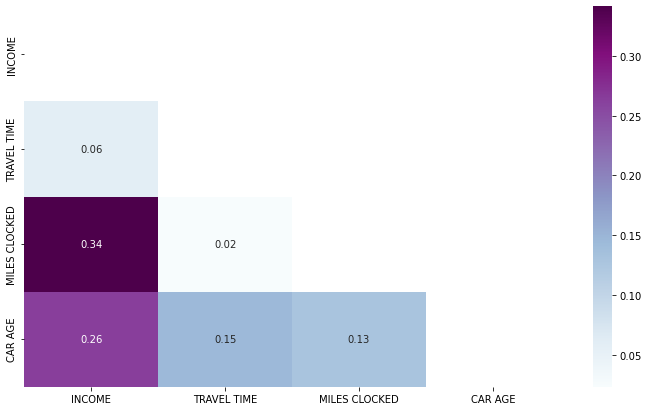

In [40]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='BuPu',mask=np.triu(np.ones_like(df.corr())))
plt.show()

# Normalizing and Scaling - Is it required?

In [48]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

from scipy.stats import zscore

#from sklearn.preprocessing import minmax_scale
#minmax_scale()

In [49]:
df['INCOME'] = std_scale.fit_transform(df[['INCOME']])
df['TRAVEL TIME'] = std_scale.fit_transform(df[['TRAVEL TIME']])
df['CAR AGE'] = std_scale.fit_transform(df[['CAR AGE']])
df['MILES CLOCKED']= std_scale.fit_transform(df[['MILES CLOCKED']])

In [43]:
df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,2.186892,No,F,Bachelors,Blue Collar,0.813273,Commercial,0.529946,Sports Car,0.137267,Texas
1,0.108850,No,M,High School,Blue Collar,-0.981463,Private,0.748411,Minivan,-1.052842,Texas
2,0.448162,No,F,Bachelors,Clerical,-0.048886,Private,-0.137830,SUV,-1.052842,Texas
3,0.842148,No,F,High School,Lawyer,-1.351394,Private,0.656656,Sports Car,0.930674,Texas
4,2.340148,No,M,High School,Blue Collar,0.007325,Commercial,2.118917,Panel Truck,0.732322,Texas


**If you look at the variables INCOME, TRAVEL TIME and CAR AGE, all has been normalized and scaled in one scale now.**

<AxesSubplot:>

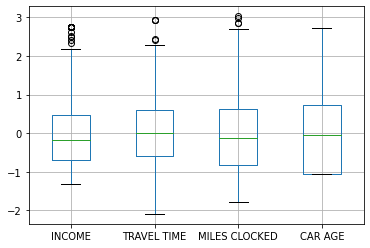

In [44]:
df.boxplot()

In [50]:
std_scale.fit_transform(df[['INCOME']])

array([[ 2.18689186e+00],
       [ 1.08849638e-01],
       [ 4.48161799e-01],
       [ 8.42148420e-01],
       [ 2.34014759e+00],
       [-1.88099507e-01],
       [ 1.13117932e+00],
       [-1.88099507e-01],
       [-1.88099507e-01],
       [-1.88099507e-01],
       [-8.34865317e-01],
       [-1.88099507e-01],
       [-8.52628072e-01],
       [ 4.75344803e-01],
       [-6.37594997e-01],
       [-7.27926870e-01],
       [-1.88099507e-01],
       [ 2.51613581e+00],
       [ 1.54779121e+00],
       [-1.74571150e-01],
       [-1.88099507e-01],
       [-4.22403177e-01],
       [-2.47689374e-01],
       [-1.30882521e+00],
       [-1.30882521e+00],
       [-1.88099507e-01],
       [-6.16167009e-02],
       [-4.23372585e-01],
       [ 4.77064429e-01],
       [ 1.76614195e-01],
       [-2.60407515e-01],
       [-6.57557897e-01],
       [ 1.77079021e+00],
       [ 8.15886967e-01],
       [-1.30882521e+00],
       [ 8.18860937e-02],
       [-9.72526342e-01],
       [-3.80276759e-01],
       [ 2.4

In [51]:
zscore(df['INCOME'])

0      2.186892
1      0.108850
2      0.448162
3      0.842148
4      2.340148
         ...   
298   -0.883331
299   -0.795259
300   -0.188100
301   -0.188100
302   -1.308825
Name: INCOME, Length: 289, dtype: float64

# ENCODING


In [53]:
dummies=pd.get_dummies(df[["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]], columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"], prefix=["married", "sex","Education","Job","Use","cartype","city"],drop_first=True).head()

In [52]:
df['EDUCATION'].unique()

array(['Bachelors', 'High School', 'Masters', 'PhD'], dtype=object)

In [54]:
columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]
df = pd.concat([df, dummies], axis=1)

# drop original column "fuel-type" from "df"
df.drop(columns, axis = 1, inplace=True)

In [55]:
df.head()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,married_Yes,sex_M,Education_High School,Education_Masters,Education_PhD,Job_Clerical,...,city_Houston,city_Las Vegas,city_Los Angeles,city_New Albany,city_New York City,city_Philadelphia,city_San Francisco,city_Seattle,city_Texas,city_Washington
0,2.186892,0.813273,0.529946,0.137267,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.108850,-0.981463,0.748411,-1.052842,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.448162,-0.048886,-0.137830,-1.052842,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.842148,-1.351394,0.656656,0.930674,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.340148,0.007325,2.118917,0.732322,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**In the data set, each Category in all of the categorical columns have been added as columns with values 0 and 1**
**Example: married_Yes, sex_M, Education_High School
**If sex_M =1, then it means its a Male and sex_M=0 means its a Female**